In [1]:

import torch
import numpy as nn
import matplotlib.pyplot as plt


In [2]:

x = torch.tensor( 14.5  )
x


tensor(14.5000)

In [3]:

y = x + 5
y


tensor(19.5000)


## Automatic gradients


In [4]:

x = torch.tensor(3.5 , requires_grad=True)
print(x)


tensor(3.5000, requires_grad=True)


In [5]:

y = (x-1) * (x-2) * (x-3)
print(y)


tensor(1.8750, grad_fn=<MulBackward0>)


In [6]:

def fun3(x):
    y = (x-1) * (x-2) * (x-3)
    return y


tensor([-1,  0,  1,  2,  3,  4,  5])
tensor([-24,  -6,   0,   0,   0,   6,  24])


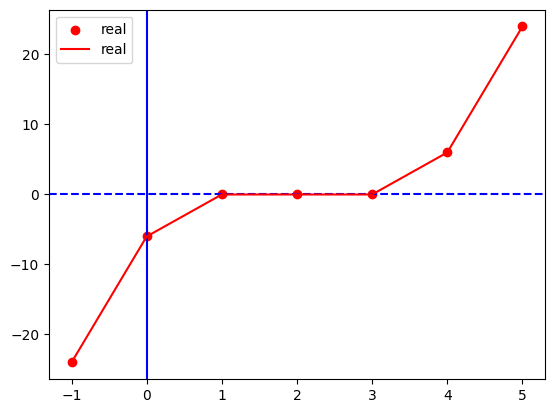

In [7]:

x1    = [ i for i in range( -1, 6   ) ] 
x1    = torch.tensor( x1 )
print(x1)
x2    = fun3( x1 )
print(x2)
        
plt.axvline(x = 0, color = 'b')  
plt.axhline(y = 0, color = 'b', linestyle='--')

plt.scatter(x1, x2, label = "real", color='red') 
plt.plot(   x1, x2, label = "real", color='red')  
        
       
plt.legend() 
plt.show()



## Gradient


In [8]:

x = torch.tensor(3.5 , requires_grad=True)
print(x)


tensor(3.5000, requires_grad=True)


In [9]:

y = (x-1) * (x-2) * (x-3)
print(y)



tensor(1.8750, grad_fn=<MulBackward0>)



$$
 \frac{dy}{dx} =
$$


In [10]:

## Work out the gradients 

y.backward()



## The derivative of y is:

$$
 3x^2 - 12 x + 11
$$


In [11]:

x.grad


tensor(5.7500)

In [12]:

y_der = 3 * (3.5 * 3.5) - 12 * (3.5) + 11
y_der


5.75


## Another Example



$$
y = x^2
$$

$$
z = 2y + 3
$$

$$
 \frac{dz}{dx} = \frac{dz}{dy}*\frac{dy}{dx} 
$$

$$
 \frac{dz}{dx} = 2 * 2x 
$$

$$
 \frac{dz}{dx} = 4x 
$$


In [13]:

x = torch.tensor(3.5 , requires_grad=True)
print(x)


tensor(3.5000, requires_grad=True)


In [14]:

y = x*x

z = 2*y + 3


In [15]:

z.backward()


In [16]:

x.grad


tensor(14.)

In [17]:

4 * x


tensor(14., grad_fn=<MulBackward0>)


## And another example (Using the chain rule of calculus)



$$
 \frac{dz}{dx} = 2 
$$

$$
 \frac{dx}{da} = 2
$$

$$
 \frac{dy}{da} = 10 * a
$$

$$
 \frac{dz}{dy} = 3
$$

$$
 \frac{dx}{db} = 3
$$

$$
 \frac{dy}{db} = 9 b^2
$$


In [18]:

## a <-2-    x  <-2-  z
## a <-10a-  y  <-3-  z 

## path 2*2 + 3*10a

## if a=2, then 4+30*2 = 64


In [19]:

a = torch.tensor(2.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)


In [20]:

x = 2*a + 3*b

y = 5*a*a + 3*b*b*b

z = 2*x + 3*y



In [21]:

z.backward()


In [22]:

a.grad


tensor(64.)


## How does all this relate to training ??

* For the previous example, assume the output is "z"
* and assume the correct value (e.g. label/regressor) is "t"
* Then the error

$$
E = (z-t)^2
$$

* The E is just another node in the computational graph 
* It is now effectively the output node

So

$$
dE/dw_1= ?? 
$$

or

$$
dE/dw_2= ?? 
$$

etc...
